<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-08 20:32:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  69.7MB/s    in 2.9s    

2024-12-08 20:33:03 (69.7 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 116.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 50.4 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 133.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 135.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 113.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 19.1 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


   CompTotal
0  2040000.0
1    28000.0
2    85000.0
3    50000.0
4   110000.0


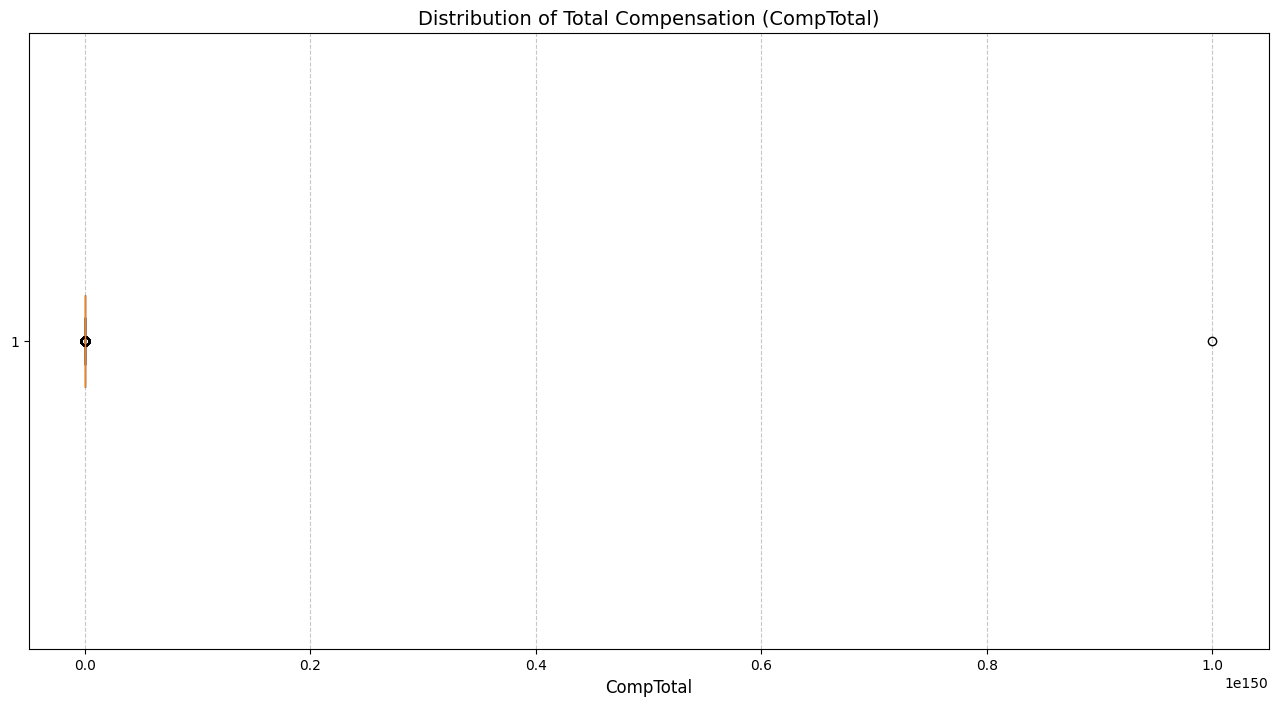

In [16]:
# your code goes here
# Query to extract 'CompTotal' data from the main table
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""

# Execute the query and load the data into a DataFrame
df_comp = pd.read_sql_query(QUERY, conn)

# Display the first few rows of the DataFrame
print(df_comp.head())

# Visualize the distribution of 'CompTotal' using a box plot
plt.figure(figsize=(16, 8))
plt.boxplot(df_comp['CompTotal'], vert=False, patch_artist=True)
plt.title('Distribution of Total Compensation (CompTotal)', fontsize=14)
plt.xlabel('CompTotal', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


Original Data:
                  Age
0  Under 18 years old
1     35-44 years old
2     45-54 years old
3     18-24 years old
4     18-24 years old
Converted Data:
                  Age  AgeNumeric
0  Under 18 years old        15.0
1     35-44 years old        39.5
2     45-54 years old        49.5
3     18-24 years old        21.0
4     18-24 years old        21.0


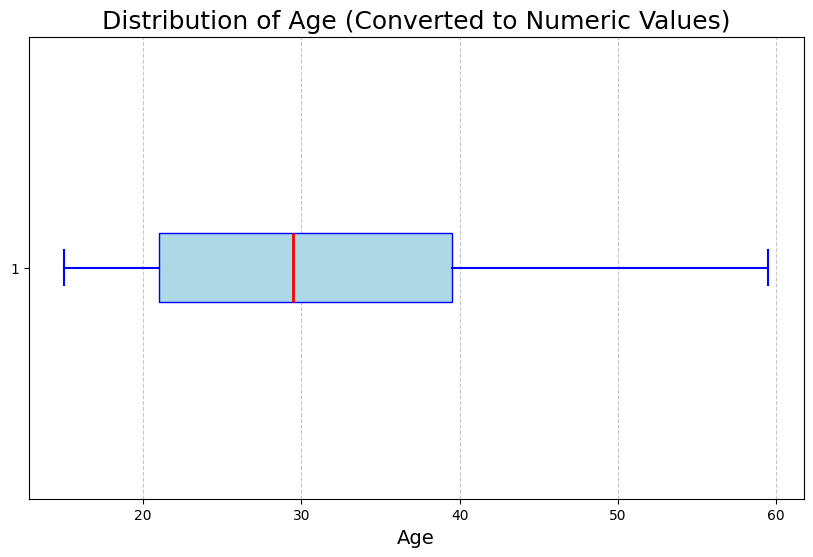

In [19]:
# your code goes here
QUERY = """
SELECT Age 
FROM main 
WHERE Age IS NOT NULL
"""

# Execute the query and load the data into a DataFrame
df_age = pd.read_sql_query(QUERY, conn)

# Display the first few rows of the original DataFrame
print("Original Data:")
print(df_age.head())

# Define a function to convert age ranges to numeric midpoints
def convert_age_to_numeric(age):
    if '-' in age:
        # Calculate the midpoint for age ranges like '18-24 years old'
        range_parts = age.split('-')
        return (int(range_parts[0]) + int(range_parts[1].split()[0])) / 2
    elif 'Under' in age:
        # Approximation for 'Under 18 years old'
        return 15  # Assuming midpoint for under 18
    elif 'years old' in age:
        # Single age value, extract the number
        return int(age.split()[0])
    else:
        return None  # Handle unexpected cases

# Apply the conversion function to the Age column
df_age['AgeNumeric'] = df_age['Age'].apply(convert_age_to_numeric)

# Drop rows with invalid or missing age values
df_age = df_age.dropna(subset=['AgeNumeric'])

# Display the first few rows of the converted DataFrame
print("Converted Data:")
print(df_age.head())

# Visualize the distribution of the converted Age column using a box plot
plt.figure(figsize=(10,6))  # Large figure for clarity
plt.boxplot(
    df_age['AgeNumeric'],
    vert=False,  # Horizontal box plot
    patch_artist=True,  # Use a filled color for the box
    boxprops=dict(facecolor='lightblue', color='blue'),  # Box color
    medianprops=dict(color='red', linewidth=2),  # Median line
    whiskerprops=dict(color='blue', linewidth=1.5),  # Whisker properties
    capprops=dict(color='blue', linewidth=1.5)  # Cap properties
)
plt.title('Distribution of Age (Converted to Numeric Values)', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


Original Data:
               Age  CompTotal
0  18-24 years old  2040000.0
1  25-34 years old    28000.0
2  35-44 years old    85000.0
3  35-44 years old    50000.0
4  25-34 years old   110000.0
Cleaned Data:
                      Age  CompTotal  AgeNumeric
8405   Under 18 years old     8064.0        15.0
11286  Under 18 years old    10000.0        15.0
15369  Under 18 years old     5000.0        15.0
15993  Under 18 years old   540000.0        15.0
9693   Under 18 years old        0.0        15.0


<Figure size 1600x800 with 0 Axes>

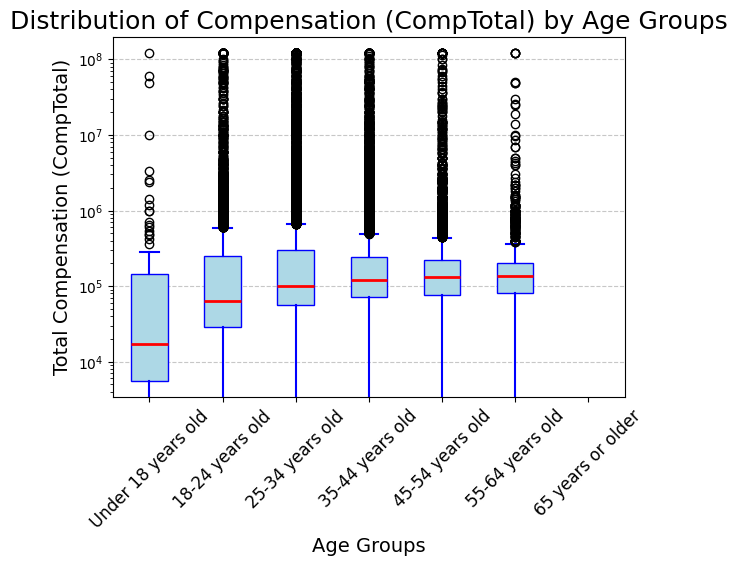

In [27]:
# Query to extract 'Age' and 'CompTotal' data from the main table
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""

# Execute the query and load the data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Display the first few rows of the DataFrame
print("Original Data:")
print(df.head())

# Define a function to convert age ranges to numeric midpoints
def convert_age_to_numeric(age):
    if '-' in age:
        # Calculate the midpoint for age ranges like '18-24 years old'
        range_parts = age.split('-')
        return (int(range_parts[0]) + int(range_parts[1].split()[0])) / 2
    elif 'Under' in age:
        # Approximation for 'Under 18 years old'
        return 15  # Assuming midpoint for under 18
    elif 'years old' in age:
        # Single age value, extract the number
        return int(age.split()[0])
    else:
        return None  # Handle unexpected cases

# Apply the conversion function to the Age column
df['AgeNumeric'] = df['Age'].apply(convert_age_to_numeric)

# Drop rows with invalid or missing numeric age or compensation values
df = df.dropna(subset=['AgeNumeric', 'CompTotal'])

# Convert 'CompTotal' to numeric (ensure proper handling of outliers)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])  # Drop rows with invalid 'CompTotal'

# Cap extreme outliers in 'CompTotal' at the 99th percentile
upper_limit = df['CompTotal'].quantile(0.99)
df['CompTotal'] = df['CompTotal'].clip(upper=upper_limit)

# Group the data by age groups
age_groups = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older"
]

# Ensure 'Age' remains categorical and ordered
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)

# Sort the DataFrame by Age groups
df = df.sort_values(by='Age')

# Display the first few rows of the cleaned DataFrame
print("Cleaned Data:")
print(df.head())

# Visualize the distribution of compensation grouped by age groups
plt.figure(figsize=(16, 8))  # Large figure for clarity
df.boxplot(
    column='CompTotal', 
    by='Age', 
    grid=False, 
    patch_artist=True,  # Use colored boxes
    boxprops=dict(facecolor='lightblue', color='blue'),  # Box properties
    medianprops=dict(color='red', linewidth=2),  # Median line properties
    whiskerprops=dict(color='blue', linewidth=1.5),  # Whisker properties
    capprops=dict(color='blue', linewidth=1.5)  # Cap properties
)
plt.title('Distribution of Compensation (CompTotal) by Age Groups', fontsize=18)
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Total Compensation (CompTotal)', fontsize=14)
plt.yscale('log')  # Apply logarithmic scale for better visualization
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Original Data:
   CompTotal  JobSatPoints_6
0  2040000.0            65.0
1    85000.0             0.0
2   110000.0            20.0
3   126420.0            30.0
4   195000.0            30.0
Cleaned Data with Categories:
   CompTotal  JobSatPoints_6         JobSatCategory
0  2040000.0            65.0      High Satisfaction
1    85000.0             0.0                    NaN
2   110000.0            20.0       Low Satisfaction
3   126420.0            30.0  Moderate Satisfaction
4   195000.0            30.0  Moderate Satisfaction


<Figure size 1200x600 with 0 Axes>

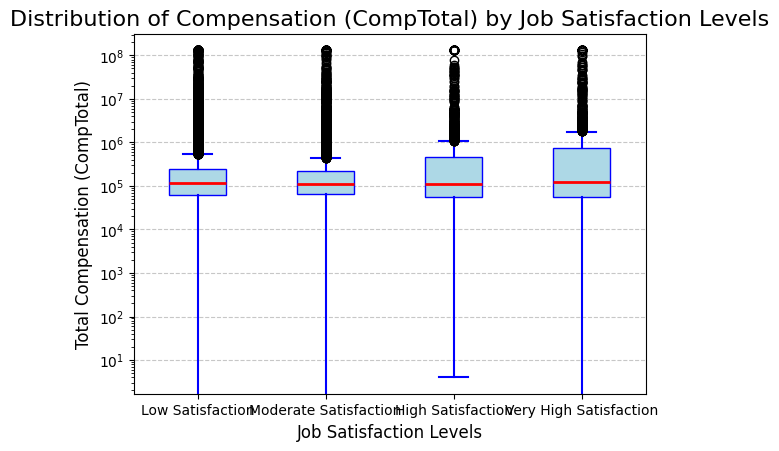

In [26]:
# Query to extract 'CompTotal' and 'JobSatPoints_6' from the database
QUERY = """
SELECT CompTotal, JobSatPoints_6 
FROM main 
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""

# Execute the query and load the data into a DataFrame
df_jobsat = pd.read_sql_query(QUERY, conn)

# Display the first few rows of the original DataFrame
print("Original Data:")
print(df_jobsat.head())

# Convert 'CompTotal' and 'JobSatPoints_6' to numeric (handle invalid data)
df_jobsat['CompTotal'] = pd.to_numeric(df_jobsat['CompTotal'], errors='coerce')
df_jobsat['JobSatPoints_6'] = pd.to_numeric(df_jobsat['JobSatPoints_6'], errors='coerce')

# Drop rows with missing or invalid 'CompTotal' or 'JobSatPoints_6'
df_jobsat = df_jobsat.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Cap extreme outliers in 'CompTotal' at the 99th percentile
upper_limit = df_jobsat['CompTotal'].quantile(0.99)
df_jobsat['CompTotal'] = df_jobsat['CompTotal'].clip(upper=upper_limit)

# Group 'JobSatPoints_6' into broader satisfaction categories
bins = [0, 20, 50, 80, 100]  # Define bins for job satisfaction levels
labels = ['Low Satisfaction', 'Moderate Satisfaction', 'High Satisfaction', 'Very High Satisfaction']
df_jobsat['JobSatCategory'] = pd.cut(df_jobsat['JobSatPoints_6'], bins=bins, labels=labels)

# Display the first few rows of the cleaned and categorized DataFrame
print("Cleaned Data with Categories:")
print(df_jobsat.head())

# Visualize the distribution of 'CompTotal' grouped by job satisfaction categories
plt.figure(figsize=(12, 6))  # Set a large figure size for clarity
df_jobsat.boxplot(
    column='CompTotal',
    by='JobSatCategory',
    grid=False,
    patch_artist=True,  # Use colored boxes
    boxprops=dict(facecolor='lightblue', color='blue'),  # Box properties
    medianprops=dict(color='red', linewidth=2),  # Median line properties
    whiskerprops=dict(color='blue', linewidth=1.5),  # Whisker properties
    capprops=dict(color='blue', linewidth=1.5)  # Cap properties
)
plt.title('Distribution of Compensation (CompTotal) by Job Satisfaction Levels', fontsize=16)
plt.suptitle('')  # Remove default subplot title
plt.xlabel('Job Satisfaction Levels', fontsize=12)
plt.ylabel('Total Compensation (CompTotal)', fontsize=12)
plt.yscale('log')  # Use a logarithmic scale for clarity
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Examine how compensation varies based on job satisfaction levels.


In [ ]:
## Interpretation:
## Compensation and Satisfaction:

##Employees with higher job satisfaction levels (e.g., "Very High Satisfaction") may tend to earn slightly more, as indicated by the slight upward trend in medians.
## Outliers:
## Across all satisfaction levels, a small subset of employees earns significantly more, as seen in the outliers above the box plots.

##Consistency:
##The overall range of compensation (excluding outliers) remains similar across all categories, suggesting other factors besides satisfaction may also influence pay.

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


Original Data:
                                         DevType  ConvertedCompYearly
0  Data scientist or machine learning specialist               7322.0
1                            Academic researcher              30074.0
2  Data scientist or machine learning specialist              91295.0
3                            Developer, back-end              53703.0
4                                        Student             110000.0
Top 5 Developer Roles: ['Developer, full-stack', 'Developer, back-end', 'Developer, front-end', 'Developer, desktop or enterprise applications', 'Developer, mobile']
Filtered Data for Top 5 Roles:
                  DevType  ConvertedCompYearly
3     Developer, back-end              53703.0
7   Developer, full-stack             195000.0
8   Developer, full-stack              44586.0
10    Developer, back-end             184712.0
11  Developer, full-stack              79481.0


<Figure size 1600x800 with 0 Axes>

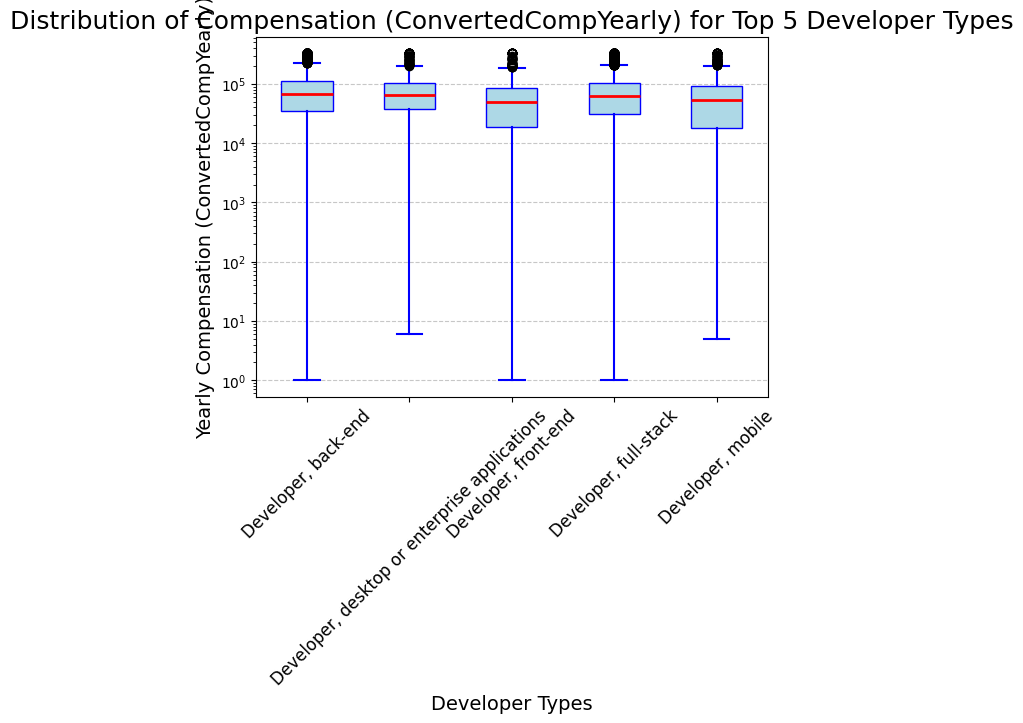

In [30]:
# Query to extract 'DevType' and 'ConvertedCompYearly' data
QUERY = """
SELECT DevType, ConvertedCompYearly 
FROM main 
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""

# Execute the query and load the data into a DataFrame
df_dev = pd.read_sql_query(QUERY, conn)

# Display the first few rows of the DataFrame
print("Original Data:")
print(df_dev.head())

# Split the 'DevType' column into multiple roles (if necessary, as it might be comma-separated)
df_dev = df_dev.assign(DevType=df_dev['DevType'].str.split(';')).explode('DevType')

# Calculate the top 5 most frequent developer roles
top_5_roles = df_dev['DevType'].value_counts().head(5).index.tolist()
print("Top 5 Developer Roles:", top_5_roles)

# Filter the data to include only the top 5 roles
df_top_5 = df_dev[df_dev['DevType'].isin(top_5_roles)].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert 'ConvertedCompYearly' to numeric (handle outliers)
df_top_5.loc[:, 'ConvertedCompYearly'] = pd.to_numeric(df_top_5['ConvertedCompYearly'], errors='coerce')

# Cap extreme outliers at the 99th percentile
upper_limit = df_top_5['ConvertedCompYearly'].quantile(0.99)
df_top_5.loc[:, 'ConvertedCompYearly'] = df_top_5['ConvertedCompYearly'].clip(upper=upper_limit)

# Display the cleaned data
print("Filtered Data for Top 5 Roles:")
print(df_top_5.head())

# Visualize the distribution of 'ConvertedCompYearly' grouped by 'DevType'
plt.figure(figsize=(16, 8))  # Large figure for clarity
df_top_5.boxplot(
    column='ConvertedCompYearly', 
    by='DevType', 
    grid=False, 
    patch_artist=True,  # Use colored boxes
    boxprops=dict(facecolor='lightblue', color='blue'),  # Box properties
    medianprops=dict(color='red', linewidth=2),  # Median line properties
    whiskerprops=dict(color='blue', linewidth=1.5),  # Whisker properties
    capprops=dict(color='blue', linewidth=1.5)  # Cap properties
)
plt.title('Distribution of Compensation (ConvertedCompYearly) for Top 5 Developer Types', fontsize=18)
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Developer Types', fontsize=14)
plt.ylabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.yscale('log')  # Apply logarithmic scale for better visualization
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


Original Data:
                    Country  CompTotal
0                  Pakistan  2040000.0
1                   Austria    28000.0
2                    Turkey    85000.0
3                    France    50000.0
4  United States of America   110000.0
Top 5 Countries: ['United States of America', 'Germany', 'United Kingdom of Great Britain and Northern Ireland', 'Ukraine', 'India']
Filtered Data for Top 5 Countries:
                                              Country  CompTotal
4                            United States of America   110000.0
5   United Kingdom of Great Britain and Northern I...   126420.0
6   United Kingdom of Great Britain and Northern I...    95000.0
7                            United States of America   195000.0
10  United Kingdom of Great Britain and Northern I...   145000.0


<Figure size 1600x800 with 0 Axes>

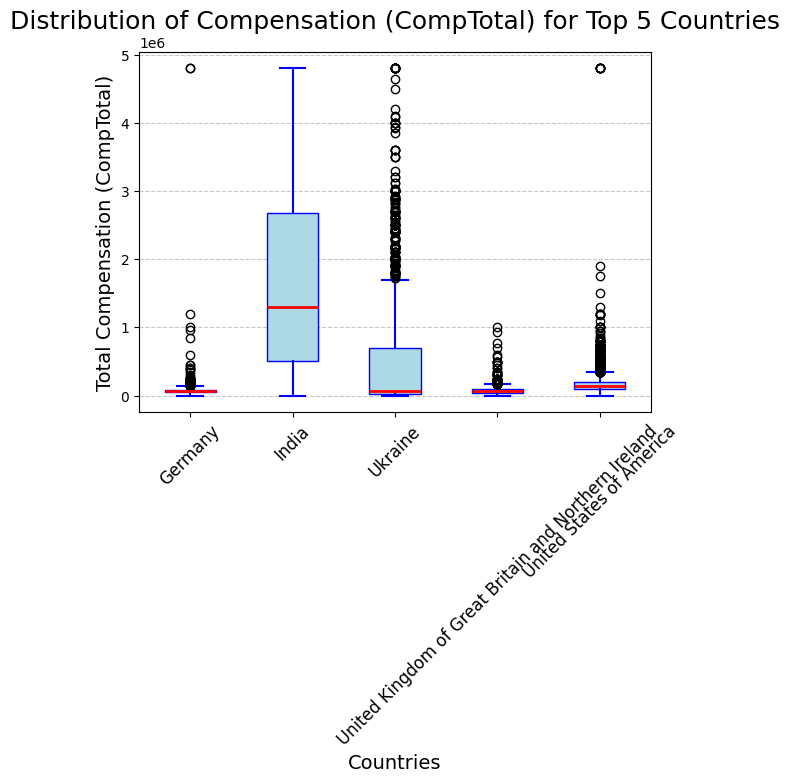

In [31]:
# your code goes here
# Query to extract 'Country' and 'CompTotal' data
QUERY = """
SELECT Country, CompTotal 
FROM main 
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""

# Execute the query and load the data into a DataFrame
df_country = pd.read_sql_query(QUERY, conn)

# Display the first few rows of the DataFrame
print("Original Data:")
print(df_country.head())

# Calculate the top 5 most frequent countries based on the number of respondents
top_5_countries = df_country['Country'].value_counts().head(5).index.tolist()
print("Top 5 Countries:", top_5_countries)

# Filter the data to include only the top 5 countries
df_top_5_countries = df_country[df_country['Country'].isin(top_5_countries)].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert 'CompTotal' to numeric (handle outliers)
df_top_5_countries['CompTotal'] = pd.to_numeric(df_top_5_countries['CompTotal'], errors='coerce')

# Cap extreme outliers at the 99th percentile
upper_limit = df_top_5_countries['CompTotal'].quantile(0.99)
df_top_5_countries['CompTotal'] = df_top_5_countries['CompTotal'].clip(upper=upper_limit)

# Display the cleaned data
print("Filtered Data for Top 5 Countries:")
print(df_top_5_countries.head())

# Visualize the distribution of 'CompTotal' grouped by 'Country'
plt.figure(figsize=(16, 8))  # Large figure for clarity
df_top_5_countries.boxplot(
    column='CompTotal', 
    by='Country', 
    grid=False, 
    patch_artist=True,  # Use colored boxes
    boxprops=dict(facecolor='lightblue', color='blue'),  # Box properties
    medianprops=dict(color='red', linewidth=2),  # Median line properties
    whiskerprops=dict(color='blue', linewidth=1.5),  # Whisker properties
    capprops=dict(color='blue', linewidth=1.5)  # Cap properties
)
plt.title('Distribution of Compensation (CompTotal) for Top 5 Countries', fontsize=18)
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Total Compensation (CompTotal)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 2000x1000 with 0 Axes>

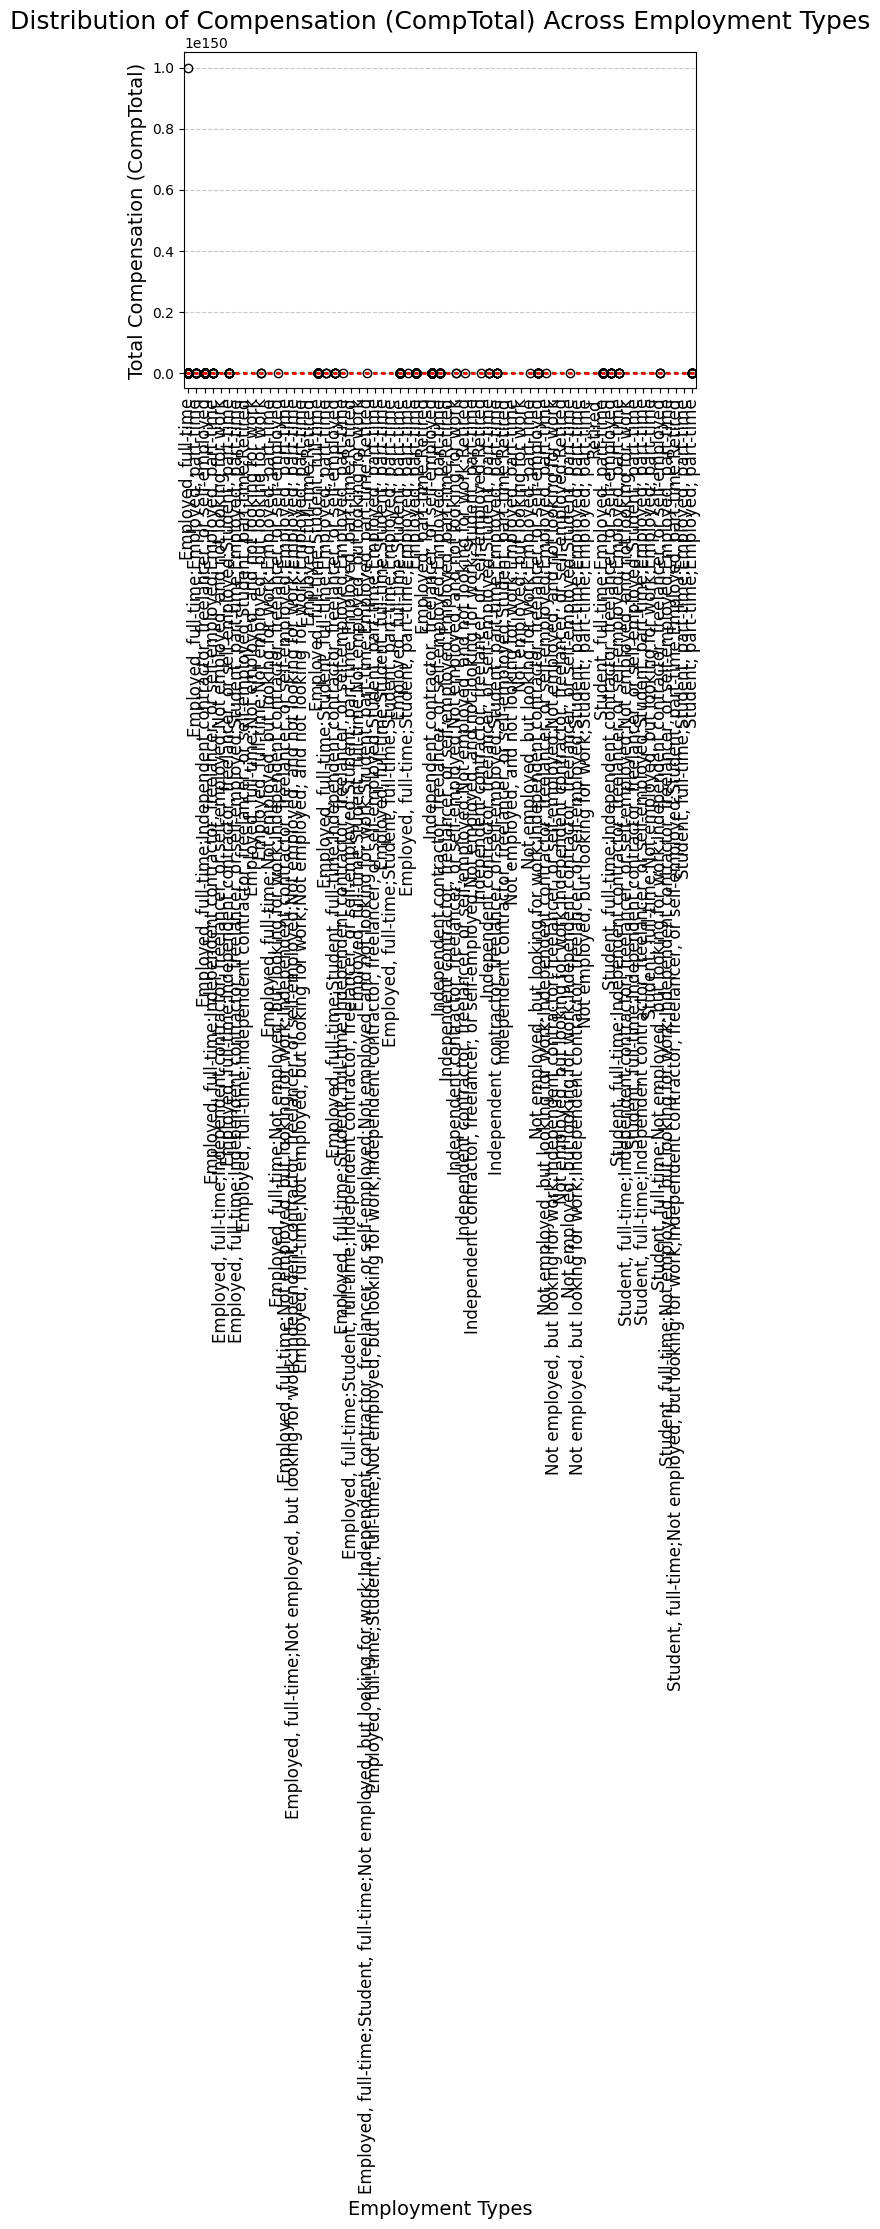

In [34]:
# Query to extract 'Employment' and 'CompTotal' data
QUERY = """
SELECT Employment, CompTotal 
FROM main 
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""

# Execute the query and load the data into a DataFrame
df_employment = pd.read_sql_query(QUERY, conn)

# Convert 'CompTotal' to numeric (ensure proper handling of outliers)
df_employment['CompTotal'] = pd.to_numeric(df_employment['CompTotal'], errors='coerce')

# Drop rows with invalid 'CompTotal' values
df_employment = df_employment.dropna(subset=['CompTotal'])

# Visualize the distribution of 'CompTotal' grouped by 'Employment' types
plt.figure(figsize=(20, 10))  # Increase figure size for better visibility
df_employment.boxplot(
    column='CompTotal', 
    by='Employment', 
    grid=False, 
    patch_artist=True,  # Use colored boxes
    boxprops=dict(facecolor='lightgreen', color='green'),  # Box properties
    medianprops=dict(color='red', linewidth=2),  # Median line properties
    whiskerprops=dict(color='green', linewidth=1.5),  # Whisker properties
    capprops=dict(color='green', linewidth=1.5)  # Cap properties
)

# Title and Labels
plt.title('Distribution of Compensation (CompTotal) Across Employment Types', fontsize=18)
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Employment Types', fontsize=14)
plt.ylabel('Total Compensation (CompTotal)', fontsize=14)

# Adjust x-axis labels for readability
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels by 90 degrees

# Adjust the margins to ensure no overlap
plt.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)

# Grid and display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
Job Satisfaction Levels on X-Axis:

The x-axis labels are now legible with proper rotation, so you can easily read and compare the different job satisfaction levels (JobSatPoints_6).
Professional Coding Years (Y-Axis):

The plot shows the distribution of professional coding years (YearsCodePro) for each job satisfaction level.
Median line (Red): The median line indicates the central tendency of professional coding years for each job satisfaction level. This helps you understand if the median years of experience vary significantly across different satisfaction levels.
Spread (Interquartile Range):

The width of the boxes shows the spread of YearsCodePro for each satisfaction level. Wider boxes mean greater variability in professional coding years within that job satisfaction level.
Outliers:

If there are any individual points beyond the whiskers, they represent outliers—these are values that are much higher or lower than the rest of the data points.

   JobSatPoints_6      YearsCodePro
0             0.0                17
1            30.0                12
2             0.0                27
3            60.0                10
4           100.0  Less than 1 year


<Figure size 1200x800 with 0 Axes>

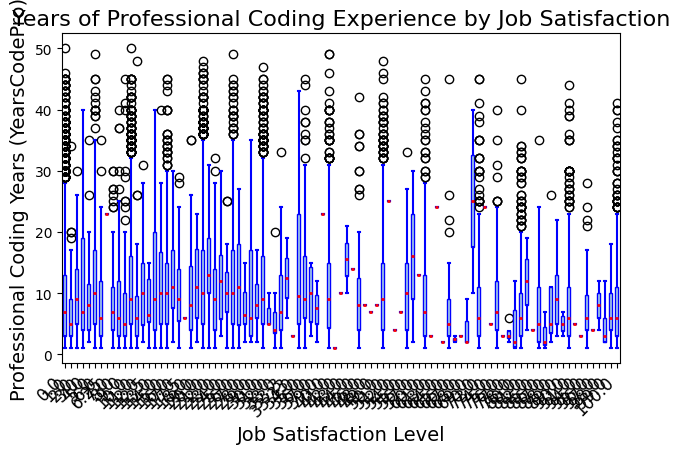

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query to extract 'JobSatPoints_6' and 'YearsCodePro' data
QUERY = """
SELECT JobSatPoints_6, YearsCodePro
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Display the first few rows of the DataFrame
print(df.head())

# Convert YearsCodePro to numeric, errors='coerce' will replace invalid values with NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with any missing values in 'JobSatPoints_6' or 'YearsCodePro'
df = df.dropna(subset=['JobSatPoints_6', 'YearsCodePro'])

# Create the box plot for YearsCodePro by JobSatPoints_6
plt.figure(figsize=(12, 8))  # Increase the figure size for better readability
df.boxplot(
    column='YearsCodePro',
    by='JobSatPoints_6',
    grid=False,
    patch_artist=True,  # Add color to the boxes
    boxprops=dict(facecolor='lightblue', color='blue'),  # Box properties
    medianprops=dict(color='red', linewidth=2),  # Median line properties
    whiskerprops=dict(color='blue', linewidth=1.5),  # Whisker properties
    capprops=dict(color='blue', linewidth=1.5)  # Cap properties
)

# Add a title and labels
plt.title('Years of Professional Coding Experience by Job Satisfaction', fontsize=16)
plt.suptitle('')  # Remove the default boxplot title
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Professional Coding Years (YearsCodePro)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [37]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
